# Ceno Analyzer
1.Wyświetlenie listy kroków produktów o których zostały pobrane opinie

2.Pobranie od uzytkowników kodu produktu którego statystyki mają być policzone 

3.Wczytanie z pliku JSON opinii o produkcie którego statystyki maja być policzone 

4.Policzone podstawowe statystyk

5.Przygotowanie wykresów 

     -Histogram częstości ocen produktów 

     -Wykres udziału rekomendacji o opiniach 

1.Import bibliotek


In [22]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



2.Wyświetlenie  listy kodów produktów o których zostały pobrane opinie 

In [23]:
print(*[filename.split(".")[0] for filename in os.listdir('opinions')], sep="\n")

124893467
49729622
63717975
63902751


3.Pobranie od uzytkowników kodu produktu którego statystyki mają być policzone

In [24]:
product_code =  input("Podaj kod produktu z z Ceno.pl")
url=f"https://www.ceneo.pl/{product_code}#tab=reviews"

4. Wczytanie z pliku JSON opinii o produkcie

In [33]:
opinions = pd.read_json(f"opinions/{product_code}.json")
opinions.stars = opinions.stars.apply(lambda s: s.split('/')[0].replace(',','.')).astype(float)


5.Policzone podstawowe statystyk

In [34]:
opinions_count = opinions.shape[0]
pros_count = opinions["pros"].astype(bool).sum()
cons_count = opinions["cons"].astype(bool).sum()
average_stars = opinions["stars"].mean()


In [37]:
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,pros_date,purchase_date,useful,useless
0,11065366,PAWEŁ,NaN,5.0,Super tania w eksploatacji drukarka. Na starci...,"[None, None, None]",[],NaN,NaN,NaN,NaN
1,16359180,k...a,NaN,5.0,"Drukarkę mam dopiero jeden dzień, trudno oceni...","[None, None, None]",[],NaN,NaN,NaN,NaN
2,11500113,Leszek,NaN,5.0,Bardzo fajna i tania drukarka. To już moja dru...,[],[],NaN,NaN,NaN,NaN
3,12024742,Użytkownik Ceneo,NaN,4.0,Bardzo bobra jakość wydruków. Bezproblemowa in...,[],[],NaN,NaN,NaN,NaN
4,17150684,k...8,NaN,5.0,"Świetna drukarka, polecam ;)",[],[],NaN,NaN,NaN,NaN
5,8745615,Paweł,NaN,5.0,W poprzednich moich drukarkach atramentowych m...,[],[],NaN,NaN,NaN,NaN
6,13089101,r...y,NaN,5.0,Bardzo dobry sprzęt,[],[],NaN,NaN,NaN,NaN
7,12317852,Piotr,NaN,5.0,Świetne urządzenie!,[],[],NaN,NaN,NaN,NaN
8,12017253,Użytkownik Ceneo,NaN,5.0,Super jak to HP,[],[],NaN,NaN,NaN,NaN
9,12333929,Użytkownik Ceneo,NaN,5.0,Polecam,[],[],NaN,NaN,NaN,NaN


In [38]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()
average_stars



4.9

5.Przygotowanie wykresów

6.Histogram częstości występowania

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

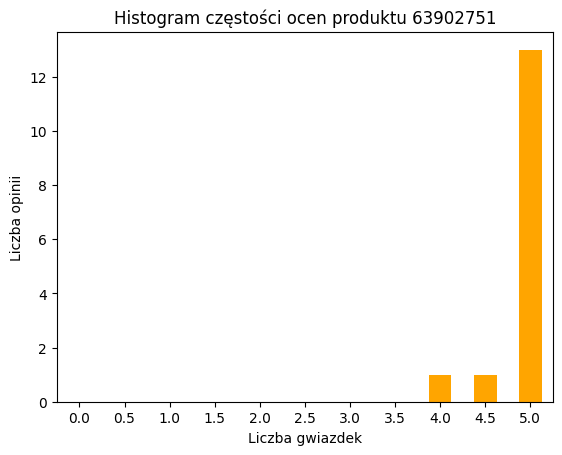

In [40]:
stars_distr = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5),fill_value=0)
stars_distr.plot.bar(color='orange')
plt.title(f"Histogram częstości ocen produktu {product_code}")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)


-Kołowy

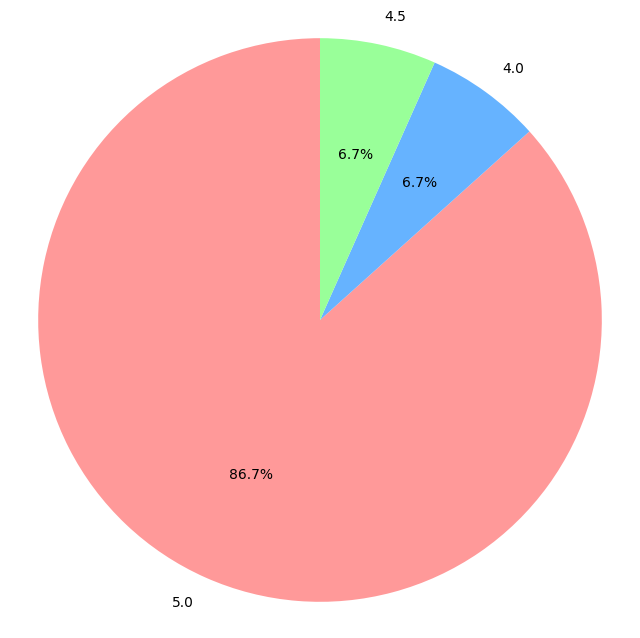

In [43]:
recommendation_distr = opinions.recommendation.value_counts()
star_counts = opinions["stars"].value_counts().sort_values(ascending=False)

labels = star_counts.index.to_numpy()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(star_counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors)  
plt.axis('equal')  # Ensure equal aspect ratio

# Display the pie chart
plt.show()